## Unsupervised learning using KMeans clustering 

## Predicting Clusters

## Objectives

On completing this assignment, you will be able to write a simple AI unsupervised application using KMeans clustering.

## Description

In this assignment, you will use KMeans of sklearn.cluster module to produce 3 clusters using 2 columns of penguin data set as features. 

#### Data set to be used for KMeans

Use the following data set:

penguin.csv

#### Read the data set as below:

df=pd.read_csv('penguin.csv',index_col=0)

#### Columns to be used

Use the following columns:

bill_length_mm,	bill_depth_mm

#### Models to be used for KMeans

Use the following algorthm:

KMeans of sklearn.cluster module

#### Number of clusters to be produced

For KMeans, specify 3 clusters.

#### After KMeans is trained

After KMean is done with training, do the following:

- print the cluster
- print the cluster centers


#### Work on species column

Species column contains the true labels. So do the following:

- Specify the encoding sequence say in variable maplist and then, in accordance with that sequence, encode the contents of species column from three species name to numbers (0, 1, and 2) using the OrdinalEncoder
- Print the encoded values
- Make sure that the list of encoded values of species is similar to the list of cluster numbers produced by KMeans for data items. Otherwise, try encoding using a different sequence of values in the maplist variable.`

#### Graphically show the following

- Graphically show all data items as points in a scatter graph in three different colors representing different clusters produced by KMeans model.
- Also, in the same above graph, show three cluster centers (centroid) obtained from KMeans with the symbol X.
- Also, in another graph, show all data items as points in a scatter graph in three different colors representing three different species per true labels.

  
#### Compare the true label against the cluster number produced by KMeans

Compare the true labels against the predicted label by printing the follow:

- number of items successfully classified
- accuracy score
- classification report
- confusion matrix

#### Graphically show the true labels against the predicted labels

Graphically show the predicted label and true labels as below.

- Graphically show all data items as points in a scatter graph in three different colors representing different clusters per KMeans model.
- In another graph, show all data items as points in a scatter graph in three different colors representing three different species per true labels.

#### Compare the performance of unsupervised learning of KMeans with supervised learning of SVM

Compare the performance of KMeans with SVC classifier as below:

- Write code that will perform supervised learning with SVC classifier of sklearn.svm module with the same data using bill_length_mm, bill_depth_mm columns as features and species column as labels. Use 80% of the data for training and 20% for testing and produce accuracy score.
- Compare the accuracy score of KMeans with that of SVC (Support Vector Classifier) of the SVM (Support Vector Machine).


## Title: Clustering Penguins Using KMeans and SVC - A Comparative Study

### Keith Yrisarri Stateson
July 16, 2024. Python 3.11.0

##### Summary
This program is an AI application to explore the inherent structure of the Penguin dataset using unsupervised and supervised learning techniques. The goal is to discover patterns and groupings within the Penguin dataset using KMeans clustering, providing insights into the natural categorization of Penguin species. Additionally, the program compares the performance of KMeans with a supervised SVC classifier to understand the effectiveness of unsupervised learning versus supervised learning in classifying Penguin species.

The program involves data cleaning, exploratory data analysis (EDA), and the implementation of KMeans clustering and SVC classification. Each model is evaluated to identify the best method for grouping and classifying the data.

Assumption: The features of the Penguin dataset are sufficient for distinguishing between the Penguin species.

### Table of Contents
Part 1: Importing Libraries and Loading the Dataset

Part 2: Data Cleaning

Part 3: Exploratory Data Analysis (EDA)

Part 4: Preprocessing Data

Part 5: KMeans Clustering Model

Part 6: Predicting the Clusters

Part 7: Determining the Cluster Centers

Part 8: Filtering True Labels and Encoding Categorical Data

Part 9: Evaluate the Accuracy of the KMeans Model's Clustering by Comparing the Predicted Cluster Labels to the True Species Labels

Part 10: Visualizing the Clusters

Part 11: Supervised Learning with SVC

Part 12: Comparing KMeans and SVC Performance

## Part 1: Libraries and Datasets

In [205]:
import warnings
warnings

<module 'warnings' from '/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/warnings.py'>

In [206]:
import pandas as pd
df = pd.read_csv('penguin.csv', index_col=0)
print(df.shape)  # rows x columns
df.head(3)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female


## Part 2: Data Cleaning

In [207]:
df.isna().sum().sum()
print(df.isna().sum())
print(f'\nNumber of rows missing a value: {df.isna().sum().sum()}')

df.dropna(inplace=True)
print(f'\nData Frame Rows x Columns: {df.shape}')
print(f'Number of rows with a missing value: {df.isna().sum().sum()}')

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

Number of rows missing a value: 19

Data Frame Rows x Columns: (333, 7)
Number of rows with a missing value: 0


## Part 3: Exploratory Data Analysis (EDA)

In [208]:
df.bill_length_mm.value_counts()

bill_length_mm
41.1    7
45.2    6
50.5    5
39.6    5
45.5    5
       ..
35.6    1
37.5    1
36.8    1
43.1    1
49.9    1
Name: count, Length: 163, dtype: int64

In [209]:
df.bill_depth_mm.value_counts()

bill_depth_mm
17.0    12
18.5    10
18.6    10
17.9    10
15.0    10
        ..
20.1     1
20.6     1
14.9     1
13.2     1
20.8     1
Name: count, Length: 79, dtype: int64

In [210]:
print(f'Unique species: {df.species.unique()}')
print(f'Total species: {df.species.nunique()}')

Unique species: ['Adelie' 'Chinstrap' 'Gentoo']
Total species: 3


## Part 4: Preprocessing Data

In [211]:
df_features = df[['bill_length_mm', 'bill_depth_mm']]
df_features.head(3)

,bill_length_mm,bill_depth_mm
0,39.1,18.7
1,39.5,17.4
2,40.3,18.0


## Part 5: KMeans Clustering - Unsupervised Learning

In [212]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=3)
kmeans_model.fit(df_features)

KMeans(n_clusters=3)

## Part 6: KMeans Predicting the Clusters

In [213]:
# cluster_labels = kmeans_model.labels_ 
cluster_labels = kmeans_model.predict(df_features)  # variation of the above line of code, same result
print(cluster_labels)
type(cluster_labels)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2
 2 0 2 0 0 2 0 2 0 2 0 2 0 2 2 2 0 2 0 2 0 2 0 2 2 2 0 2 1 2 0 2 2 0 0 2 0
 2 2 0 2 0 2 2 2 2 2 2 0 2 0 2 0 2 0 2 2 0 2 0 0 2 0 2 2 2 0 2 0 2 0 0 0 0
 0 0 0 2 0 0 0 2 0 2 0 2 2 0 0 0 0 0 0 0 2 0 0 0 2 2 2 0 0 0 2 0 2 0 2 2 0
 0 2 0 0 0 0 0 2 0 0 0 0 0 2 0 0 0 2 0 2 2 0 2 0 0 0 0 0 2 0 2 0 0 2 2 0 2
 0 2 0 2 0 2 0 2 0 2 0 2 2 0 0 2 0 2 0 2 0 0 2 0 0 2 2 0 2 0 2 2 0 0 2 0 2]


numpy.ndarray

In [214]:
# Add the predicted cluster labels to the original dataframe
df['predicted_cluster'] = cluster_labels
print(df.head(3))
print(df[['species', 'predicted_cluster']])

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  predicted_cluster  
0       3750.0    Male                  1  
1       3800.0  Female                  1  
2       3250.0  Female                  1  
    species  predicted_cluster
0    Adelie                  1
1    Adelie                  1
2    Adelie                  1
4    Adelie                  1
5    Adelie                  1
..      ...                ...
338  Gentoo                  0
340  Gentoo                  0
341  Gentoo                  2
342  Gentoo                  0
343  Gentoo                  2

[333 rows x 2 columns]


In [215]:
# Determine the mapping between the species and the predicted cluster labels

species_cluster_mapping = {}

for predicted_cluster in range(len(df['predicted_cluster'].unique())):
    cluster_match = df[df['predicted_cluster'] == predicted_cluster]['species'].mode()[0]
    species_cluster_mapping[predicted_cluster] = cluster_match

# species_cluster_mapping = df[['species', 'predicted_cluster']].drop_duplicates().sort_values('predicted_cluster')

print(f'Cluster to Species Mapping:\n{species_cluster_mapping}')

Cluster to Species Mapping:
{0: 'Gentoo', 1: 'Adelie', 2: 'Gentoo'}


## Part 7: KMeans Determining the Cluster Centers

In [216]:
cluster_centers = kmeans_model.cluster_centers_
print(cluster_centers)
# next step is (i) evaluate the model, and (ii) plot the data points and the cluster centers

[[45.50982143 15.68303571]
 [38.42426471 18.27794118]
 [50.90352941 17.33647059]]


## Part 8: Filtering True Labels, Encoding Categorical Data, Feature Engineering

OrdinalEncoder: This is generally used to encode features in a dataset where you may have multiple categorical columns. It can handle multiple columns at once and transform them into their respective numerical values. It is useful when you need to transform multiple columns that contain ordinal or nominal categorical data.

LabelEncoder: This is typically used to encode the target labels (i.e., the response variable) into numerical values. It is designed to handle a single column of categorical data, making it more straightforward for transforming the labels of the target variable in classification tasks.

In [217]:
# Create a DataFrame of true labels (the actual species labels)
# This will be used for mapping the predicted clusters to the actual species
df_true_labels = df.filter(['species'], axis=1)
print(type(df_true_labels))
print(df_true_labels.shape)
print(df_true_labels)

from sklearn.preprocessing import OrdinalEncoder
maplist = ['Adelie', 'Chinstrap', 'Gentoo']
oe = OrdinalEncoder(categories=[maplist])

df_true_labels.species = oe.fit_transform(df_true_labels)
print (df_true_labels.species[0:5])
print (type(df_true_labels.species))

<class 'pandas.core.frame.DataFrame'>
(333, 1)
    species
0    Adelie
1    Adelie
2    Adelie
4    Adelie
5    Adelie
..      ...
338  Gentoo
340  Gentoo
341  Gentoo
342  Gentoo
343  Gentoo

[333 rows x 1 columns]
0    0.0
1    0.0
2    0.0
4    0.0
5    0.0
Name: species, dtype: float64
<class 'pandas.core.series.Series'>


In [218]:
# Convert the DataFrame to a NumPy array
ar_true_labels = df_true_labels['species'].values  # .values returns a NumPy array, or use: np.array(...) or df.to_numpy(...)
print(ar_true_labels)
print(type(ar_true_labels))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.

In [219]:
# Convert the DataFrame to a NumPy array
ar_features = df_features.values  # convert the DataFrame to a NumPy array
print(ar_features)

[[39.1 18.7]
 [39.5 17.4]
 [40.3 18. ]
 [36.7 19.3]
 [39.3 20.6]
 [38.9 17.8]
 [39.2 19.6]
 [41.1 17.6]
 [38.6 21.2]
 [34.6 21.1]
 [36.6 17.8]
 [38.7 19. ]
 [42.5 20.7]
 [34.4 18.4]
 [46.  21.5]
 [37.8 18.3]
 [37.7 18.7]
 [35.9 19.2]
 [38.2 18.1]
 [38.8 17.2]
 [35.3 18.9]
 [40.6 18.6]
 [40.5 17.9]
 [37.9 18.6]
 [40.5 18.9]
 [39.5 16.7]
 [37.2 18.1]
 [39.5 17.8]
 [40.9 18.9]
 [36.4 17. ]
 [39.2 21.1]
 [38.8 20. ]
 [42.2 18.5]
 [37.6 19.3]
 [39.8 19.1]
 [36.5 18. ]
 [40.8 18.4]
 [36.  18.5]
 [44.1 19.7]
 [37.  16.9]
 [39.6 18.8]
 [41.1 19. ]
 [36.  17.9]
 [42.3 21.2]
 [39.6 17.7]
 [40.1 18.9]
 [35.  17.9]
 [42.  19.5]
 [34.5 18.1]
 [41.4 18.6]
 [39.  17.5]
 [40.6 18.8]
 [36.5 16.6]
 [37.6 19.1]
 [35.7 16.9]
 [41.3 21.1]
 [37.6 17. ]
 [41.1 18.2]
 [36.4 17.1]
 [41.6 18. ]
 [35.5 16.2]
 [41.1 19.1]
 [35.9 16.6]
 [41.8 19.4]
 [33.5 19. ]
 [39.7 18.4]
 [39.6 17.2]
 [45.8 18.9]
 [35.5 17.5]
 [42.8 18.5]
 [40.9 16.8]
 [37.2 19.4]
 [36.2 16.1]
 [42.1 19.1]
 [34.6 17.2]
 [42.9 17.6]
 [36.7 18.8]

## Part 9: KMeans Clustering Model Accuracy
Compare the Predicted Cluster Labels to the True Species Labels

In [244]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print(f'True Labels: {ar_true_labels.sum()}')  # Total true labels (species)
print(f'\nKMeans Number of Correct Predictions: {accuracy_score(ar_true_labels, cluster_labels, normalize=False)} out of {len(ar_true_labels)}')
print(f'\nKMeans Accuracy Score, % of Correct Predictions: {accuracy_score(ar_true_labels, cluster_labels)}')
print(f'\nKMeans Classification Report:\n{classification_report(ar_true_labels, cluster_labels)}')
print(f'\nKMeans Confusion Matrix:\n{confusion_matrix(ar_true_labels, cluster_labels)}')


True Labels: 306.0

KMeans Number of Correct Predictions: 57.0 out of 333

KMeans Accuracy Score, % of Correct Predictions: 0.17117117117117117

KMeans Classification Report:
              precision    recall  f1-score   support

         0.0       0.10      0.08      0.09       146
         1.0       0.01      0.01      0.01        68
         2.0       0.53      0.38      0.44       119

    accuracy                           0.17       333
   macro avg       0.21      0.16      0.18       333
weighted avg       0.23      0.17      0.20       333


KMeans Confusion Matrix:
[[ 11 135   0]
 [ 27   1  40]
 [ 74   0  45]]


In [221]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(ar_features, cluster_labels)
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.48441306051483224


## Part 10: KMeans Clustering Visualization

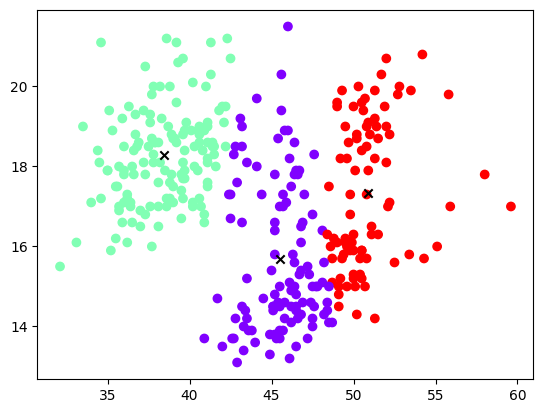

In [222]:
import matplotlib.pyplot as plt

# Scatter plot of the features with the predicted clusters
plt.scatter (ar_features[:, 0], ar_features [: ,1], c=cluster_labels, cmap='rainbow')

# Scatter plot predicted cluster centers
plt.scatter (cluster_centers[:,0],cluster_centers[:,1], c='black', marker='x' )

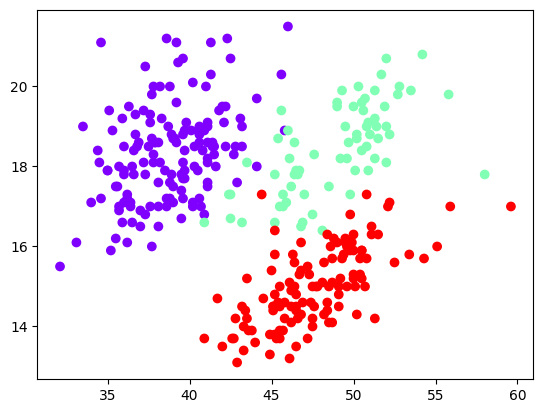

In [223]:
# Scatter plot of the features with the true species labels
plt.scatter ( ar_features [: , 0], ar_features [: ,1], c=ar_true_labels, cmap='rainbow')

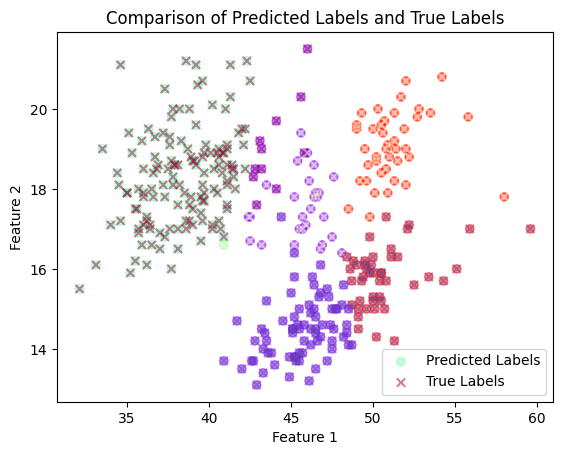

In [224]:
import matplotlib.pyplot as plt

# Create the scatter plot for predicted labels
plt.scatter(ar_features[:, 0], ar_features[:, 1], c=cluster_labels, cmap='rainbow', marker='o', alpha=0.5, label='Predicted Labels')

# Overlay the scatter plot for true labels
plt.scatter(ar_features[:, 0], ar_features[:, 1], c=ar_true_labels, cmap='Spectral', marker='x', alpha=0.5, label='True Labels')

# Adding a legend to differentiate between the two plots
plt.legend()

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Comparison of Predicted Labels and True Labels')

# Show the plot
plt.show()

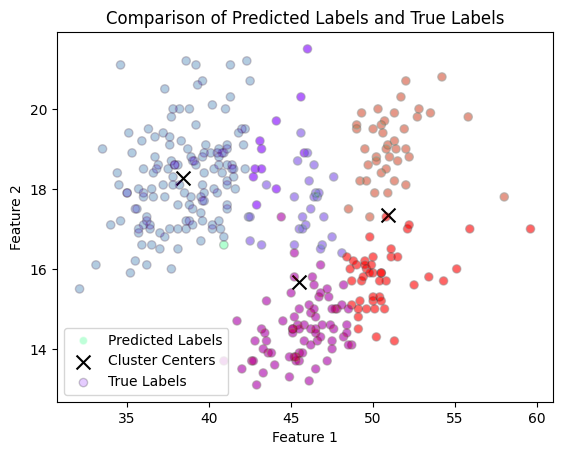

In [225]:
import matplotlib.pyplot as plt

# Assuming ar_features, cluster_labels, and ar_true_labels are already defined

# Create the scatter plot for predicted labels
plt.scatter(ar_features[:, 0], ar_features[:, 1], c=cluster_labels, cmap='rainbow', marker='o', alpha=0.5, edgecolor='w', label='Predicted Labels')

# Overlay the cluster centers with a distinct color
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='black', marker='x', s=100, label='Cluster Centers')

# Overlay the scatter plot for true labels with a different alpha value
plt.scatter(ar_features[:, 0], ar_features[:, 1], c=ar_true_labels, cmap='rainbow', marker='o', alpha=0.2, edgecolor='k', label='True Labels')

# Adding a legend to differentiate between the two plots
plt.legend()

# Adding labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Comparison of Predicted Labels and True Labels')

# Show the plot
plt.show()


## Part 11: Train-Test Split and Feature Scaling

In [232]:
# Feature Engineering is completed
print(type(df_features))
print(type(df_true_labels))
print(type(ar_features))
print(type(ar_true_labels))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [233]:
# SVM Train-Test Split and Feature Scaling
X = ar_features
y = ar_true_labels
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the training and testing data using StandardScaler and fit_transform on the training data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled[0:5])
print('\n')
print(X_test_scaled[0:5])

[[-0.68859414  0.41178581]
 [ 0.75514402 -0.77912631]
 [ 0.60514525 -1.29691419]
 [-1.23233968 -0.05422328]
 [ 1.61763696  1.49914035]]


[[-0.8760926  -0.20955964]
 [ 0.51139602 -1.29691419]
 [-0.3885966   1.03313126]
 [ 1.05514157  0.10111308]
 [-0.57609506  0.56712217]]


## Part 12: SVC Model - Supervised Learning

In [237]:
from sklearn.svm import SVC
# svm_model = SVC()  # default kernel is 'rbf'
svm_model = SVC(kernel='linear')  # linear kernel. Add random_state=42 for reproducibility of results
svm_model.fit(X_train_scaled, y_train)

SVC(kernel='linear')

## Part 13: SVC Model Prediction

In [236]:
y_pred = svm_model.predict(X_test_scaled)
print(f'Predicted Labels: {y_pred}')
print('\n')

# Print the True Labels
print(f'True Labels: {y_test}')

Predicted Labels: [0. 2. 0. 1. 0. 2. 2. 1. 1. 1. 0. 0. 2. 0. 2. 0. 0. 1. 0. 2. 0. 0. 2. 1.
 0. 0. 2. 2. 2. 2. 1. 2. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0.
 0. 2. 0. 2. 2. 0. 0. 2. 0. 0. 1. 1. 1. 2. 2. 0. 0. 2. 0. 2. 0. 2. 0. 0.
 1. 2. 2. 1. 0. 0. 0. 2. 0. 0. 0. 0. 2. 2. 0. 2. 1. 1. 2. 2. 0. 0. 0. 0.
 0. 1. 0. 0.]


True Labels: [0. 2. 0. 1. 0. 2. 2. 1. 1. 1. 0. 0. 2. 0. 2. 0. 0. 1. 0. 2. 0. 0. 2. 1.
 0. 0. 2. 2. 1. 2. 1. 2. 0. 0. 2. 2. 1. 2. 0. 0. 0. 0. 1. 1. 0. 0. 2. 0.
 0. 2. 0. 2. 2. 0. 0. 2. 0. 0. 1. 1. 2. 2. 2. 0. 0. 2. 0. 2. 0. 2. 0. 0.
 2. 2. 2. 1. 0. 0. 0. 2. 0. 0. 1. 0. 2. 2. 0. 2. 1. 1. 2. 2. 0. 0. 0. 0.
 0. 1. 0. 0.]


## Part 14: SVC Model Accuracy

In [241]:
# MAPE Calculation for SVM Model
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'SVM MAPE: {mape}')

# Accuracy Score Calculation for SVM Model
from sklearn.metrics import accuracy_score
svc_accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Accuracy: {svc_accuracy}')

SVM MAPE: 0.03
SVM Accuracy: 0.96


## Part 15: SVC Model Visualization

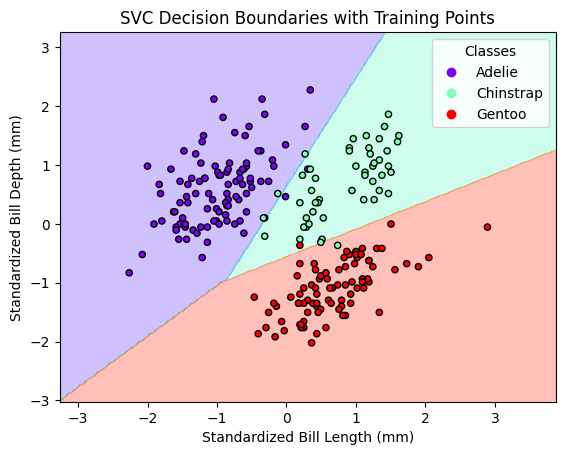

In [239]:
import numpy as np
import matplotlib.pyplot as plt

# Create a meshgrid
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict class labels for each point in the meshgrid
Z = svm_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.3, cmap='rainbow')

# Plot the training points
scatter = plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap='rainbow', edgecolor='k', s=20)

# Create legend
handles, labels = scatter.legend_elements()
class_labels = ['Adelie', 'Chinstrap', 'Gentoo']  # Replace with your class labels if different
plt.legend(handles, class_labels, title="Classes")

plt.title('SVC Decision Boundaries with Training Points')
plt.xlabel('Standardized Bill Length (mm)')
plt.ylabel('Standardized Bill Depth (mm)')
plt.show()

## Part 16: Comparing KMeans and SVC Performance

In [245]:
print(f'KMeans Accuracy: {accuracy_score(ar_true_labels, cluster_labels)}')
print(f'SVC Accuracy: {svc_accuracy}')

KMeans Accuracy: 0.17117117117117117
SVC Accuracy: 0.96
